# Uber Questions 1-12 Solution

**Overview and Instructions:**

For questions 1-12 please use the "dataset_1.csv" dataset.

So, for example, from this data look at row 10, or the hour beginning 4pm (hour 16), September 10th, 2012:

During this hour **11** people opened the Uber app (Eyeballs), **2** of them did not see any cars (Zeroes), and **4** of them requested a car (Requests). Of the **4** requests, only **3** complete trips actually resulted (Completed). During this time, there were a total **6** drivers who logged in (Unique Drivers). 

## Data Exploration

Before diving into questions, first let's analyze the dataset through some visualizations. Let's start with importing commonly used libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will do some plotting and so want to have next fixed figure size in all visuals.

In [2]:
plt.rcParams["figure.figsize"] = (12,8)

Start with reading the dataset.

In [3]:
df = pd.read_csv("./dataset_1.csv")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


See some basic information next with _.info( )_ function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              15 non-null     object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


Interesting. We have null values only in `Date` column. If they are null continously until the starting of next day, we can use forward fill method which replaces the NULL values with the value from the previous row (or previous column, if the axis parameter is set to 'columns').

In [5]:
df.head(18)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


Our instinct was correct. Let's fill non values using forward fill method.

In [6]:
# forward fill empty Dates
df = df.fillna(method="ffill")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


Now, we have the dataset without non-null values. Another thing that could be useful in question part is creating timestamps with given date and time values. Let's do it with using `f-strings`. More examples about f-strings can be found here: https://realpython.com/python-f-strings/

In [8]:
def create_timestamp(date, time):
    return pd.to_datetime(f"{date} {time}:00")
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00
...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00


It seems nothing to deal with more in the data preprocessing part. The dataset is already in a good shape. Next, we will do some visualization with given data to embrace more the given overview for the dataset. We expect to see lots of eyeballs comparing to other columns, since some of them will be converted to zeroes, request and completed trips. Let's plot these values with dates and see if is there any relation with it.

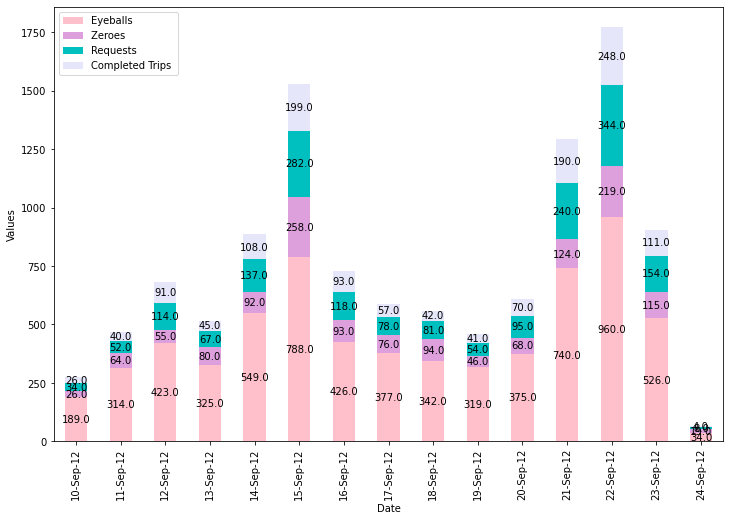

In [9]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['pink', 'plum', 'c', 'lavender']), None, len(df)))

ax = df[['Date','Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ']].groupby('Date').sum().reset_index().plot(
    kind='bar', stacked=True, x='Date', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=10)
plt.ylabel("Values")
plt.show()

The values against date plot seems kind of having weekly seasonality. We have very short time interval to test it but still we can check it by plotting against weekdays. For this purpose, we will use _.weekday_ attribute of pandas which will return an integer represent the corresponding weekday. We will aggregate and sum all values based on it falls under which weekday and plot.

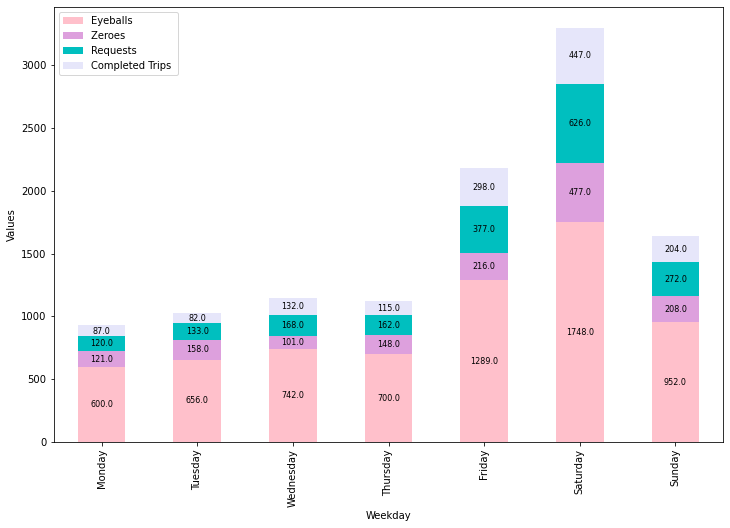

In [10]:
df['Weekday'] = df['Timestamp'].dt.weekday
df_agg_weekday = df.groupby('Weekday').sum().reset_index()

day_of_week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_agg_weekday['Weekday'] = df_agg_weekday['Weekday'].map(day_of_week)

ax=df_agg_weekday[['Weekday','Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ']].plot(
    kind='bar', stacked=True, x='Weekday', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel("Values")
plt.show()

According to our 14 days data, saturdays are the busiest. Let's see the aggregated results by hour.

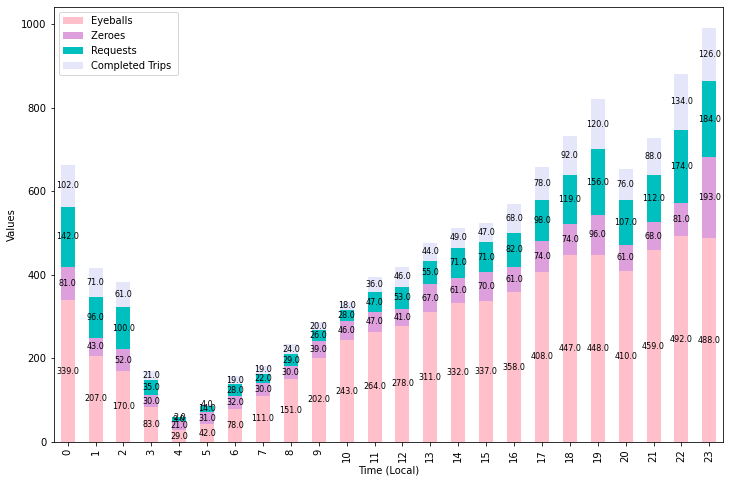

In [11]:
ax = df[['Time (Local)','Eyeballs ', 'Zeroes ', 'Requests ', 'Completed Trips ']].groupby('Time (Local)').sum().reset_index().plot(
    kind='bar', stacked=True, x='Time (Local)', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel("Values")
plt.show()

The busiest hour of the day is between 23 and midnight based on above plot. Also, the least traffic on the app is occured on 4 am, which is logical. Let's also observe the unique drivers' distribution aggregated on weekday and hour as next plots.

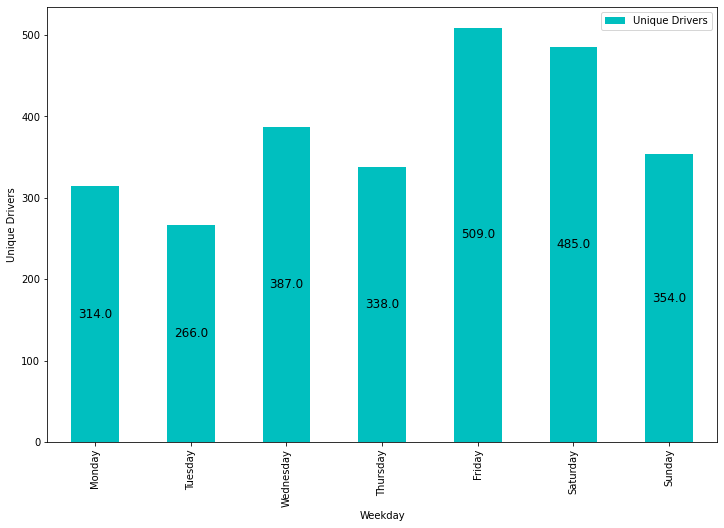

In [12]:
ax=df_agg_weekday[['Weekday','Unique Drivers']].plot(
    kind='bar', stacked=True, x='Weekday', color='c')
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=12)
plt.ylabel("Unique Drivers")
plt.show()

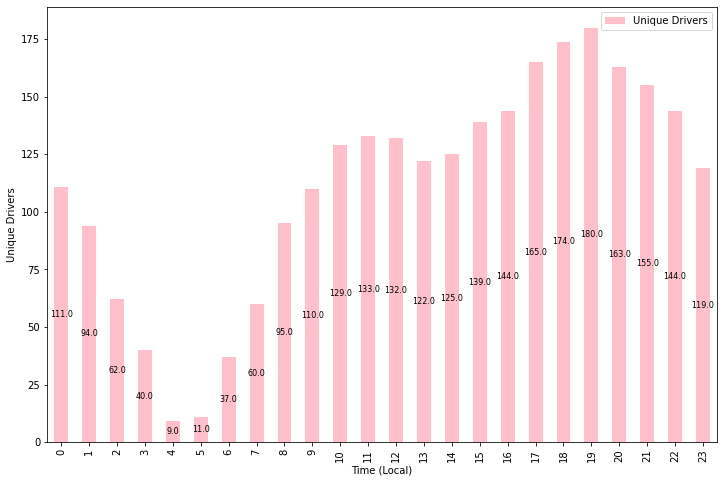

In [13]:
ax = df[['Time (Local)','Unique Drivers']].groupby('Time (Local)').sum().reset_index().plot(
    kind='bar', stacked=True, x='Time (Local)', color=my_colors)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', fontsize=8)
plt.ylabel("Unique Drivers")
plt.show()

It's aligned with what we observed in demand (requests, eyeballs, etc.) plots. Okay, we can move forward to questions now.

## QUESTION 1

Read dataset and observe the columns as in overview.

## SOLUTION 1

We have done it already in exploration part, shouldn't it be hard!

In [14]:
import pandas as pd
import numpy as np

In [15]:
# read dataset
df = pd.read_csv("./dataset_1.csv")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


In [16]:
df.head(10)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


In [17]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

## QUESTION 2

Which date had the most completed trips during the two week period?

## SOLUTION 2

Since we reread the dataset, we need to apply forward fill on `Date` column again to answer this question.

In [18]:
# forward fill empty Dates
df = df.fillna(method="ffill")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


The rest of the question is aggregating the dataset based on date since it's asked in the question and then finding the largest value based of completed trips and its date.

In [19]:
# aggregate on Date since the question asks the completed trips by Date
df_agg_date = df.groupby('Date').sum().reset_index()
df_agg_date.nlargest(1, 'Completed Trips ')

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
12,22-Sep-12,276,960,219,248,344,292


In [20]:
df_agg_date.nlargest(1, 'Completed Trips ')['Date']

12    22-Sep-12
Name: Date, dtype: object

## QUESTION 3

What was the highest number of completed trips within a 24 hour period?

## SOLUTION 3

The question asks us to create forward 24-hour periods. We can do it by creating _FixedForwardWindowIndexer_ and using it to apply rolling sum function of pandas. As question asks hour unit, we will create the timestamps as we did it on exploratory part.

In [21]:
# to be able to use resample function, create timestamp and use as index
def create_timestamp(date, time):
    return pd.to_datetime(f"{date} {time}:00")
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)

# calculate rollings sums with 24 hours period
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
df_agg_twentyfour_hrs = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum()
df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')

/var/folders/f3/gnk6jnr56xqcw18yqn9345240000gn/T/ipykernel_19553/814047687.py:8: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_agg_twentyfour_hrs = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum()


,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Timestamp,,,,,,
2012-09-21 17:00:00,276.0,1015.0,207.0,278.0,367.0,349.0


We can output it by time interval by using given information.

In [22]:
# parse time interval to output
time_format = "%Y/%m/%d %H:%M"
df_agg_twentyfour_hrs['Time Interval']  = df_agg_twentyfour_hrs.index.strftime(time_format) +  "-" + (df_agg_twentyfour_hrs.index + pd.Timedelta('24 hours')).strftime(time_format)
df_agg_twentyfour_hrs

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Time Interval
Timestamp,,,,,,,
2012-09-10 07:00:00,276.0,212.0,38.0,29.0,39.0,150.0,2012/09/10 07:00-2012/09/11 07:00
2012-09-10 08:00:00,276.0,217.0,38.0,29.0,39.0,146.0,2012/09/10 08:00-2012/09/11 08:00
2012-09-10 09:00:00,276.0,222.0,40.0,27.0,37.0,138.0,2012/09/10 09:00-2012/09/11 09:00
2012-09-10 10:00:00,276.0,229.0,39.0,27.0,37.0,130.0,2012/09/10 10:00-2012/09/11 10:00
2012-09-10 11:00:00,276.0,232.0,38.0,28.0,37.0,124.0,2012/09/10 11:00-2012/09/11 11:00
...,...,...,...,...,...,...,...
2012-09-24 02:00:00,20.0,20.0,10.0,3.0,6.0,10.0,2012/09/24 02:00-2012/09/25 02:00
2012-09-24 03:00:00,18.0,17.0,7.0,3.0,4.0,10.0,2012/09/24 03:00-2012/09/25 03:00
2012-09-24 04:00:00,15.0,14.0,4.0,3.0,3.0,10.0,2012/09/24 04:00-2012/09/25 04:00


Let's find the result using _nlargest( )_ again.

In [23]:
completed_trips = df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')['Completed Trips '].values[0]
time_interval = df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')['Time Interval'].values[0]
print("Number of completed trips:", completed_trips)
print("Time Interval:", time_interval)

Number of completed trips: 278.0
Time Interval: 2012/09/21 17:00-2012/09/22 17:00


## QUESTION 4

Which hour of the day had the most requests during the two week period?

## SOLUTION 4

We can aggregate again of Time and using nlargest we can find the hour of had the most requests.

In [24]:
# aggregate on hour
df_agg_time = df.groupby('Time (Local)').sum().reset_index()
df_agg_time.nlargest(1, 'Requests ')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
23,23,488,193,126,184,119


In [25]:
df_agg_time.nlargest(1, 'Requests ')['Time (Local)']

23    23
Name: Time (Local), dtype: int64

## QUESTION 5

What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

## SOLUTION 5

To find it we need to count all zeroes on the dataset and calculate the percentages using weekend zeroes count.

In [26]:
# all zeroes in the dataset
total_zeroes = df['Zeroes '].sum()
total_zeroes

1429

In [27]:
# all zeroes in weekend based on given condition
df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek
weekend_zeroes = df[((df['Day'] == 4) & (df['Time (Local)'] >= 17)) 
                          | (df['Day'] == 5) |
                          ((df['Day'] == 6) & (df['Time (Local)'] < 3))]['Zeroes '].sum()
weekend_zeroes

641

In [28]:
# calculate the percentage
weekend_zeroes_pct = weekend_zeroes / total_zeroes * 100
print(weekend_zeroes_pct,'%')

44.856543037088876 %


## QUESTION 6

What is the weighted average ratio of completed trips per driver during the two week period?

**Tip**: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

## SOLUTION 6

In order to calculate weighted average ratio of completed trips per driver, first we will calculate the ratio of completed per driver. Next, we will assign weights to each row based on its completed trip ratio to all completed trips. We will discard rows with zero unique drivers since it would lead to have nan rows.

In [29]:
# calculate the ratio
df['completed_trip_ratio_per_driver'] = df['Completed Trips '] / df['Unique Drivers']
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,Day,completed_trip_ratio_per_driver
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0,0.222222
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0,0.142857
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0,0.000000
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0,0.000000
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0,0.363636
...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,0,NaN
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,0,NaN
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,0,NaN
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,0,0.333333


In [30]:
# drop rows with nan 
dataset_without_zero_unique_driver = df[df['Unique Drivers'] > 0]
# calculate weighted average by giving weight as day's completed trip ratio all completed trips
weighted_average_ratio = np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'] * (dataset_without_zero_unique_driver['Completed Trips '] / dataset_without_zero_unique_driver['Completed Trips '].sum())) 
weighted_average_ratio

0.002788813372084982

The weighted average is found as 0.002788813372084982. Let's also see what it would be like if we wouldn't use weighted average approach.

In [31]:
# check it is not same with normal average
np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'])

0.4743397876937869

It is very different than what we calculated.

## QUESTION 7

In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours.

Assume that a driver will work same shift each day.

## SOLUTION 7

We will resample our dataset with 8 hours frequency by summing values within each 8 hours shift. We can do it by using _resample(frequency)_ function from pandas. Then, we can apply sum for values that fall within 8 hours intervals.

In [32]:
# resample with 8 hours period                               
df_agg_eight_hrs = df.set_index("Timestamp").resample('8H').sum()
df_agg_eight_hrs.head()

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver
Timestamp,,,,,,,,
2012-09-10 00:00:00,7,5,0,2,2,9,0,0.222222
2012-09-10 08:00:00,92,78,10,9,11,89,0,0.831169
2012-09-10 16:00:00,156,106,16,15,21,40,0,3.047619
2012-09-11 00:00:00,28,33,12,5,7,17,8,1.400000
2012-09-11 08:00:00,92,108,11,5,6,58,8,0.690079


Let's also put time intervals resulted by resampling into the dataframe.

In [33]:
time_format = "%Y/%m/%d %H:%M"
df_agg_eight_hrs['Time Interval']  = df_agg_eight_hrs.index.strftime(time_format) +  "-" + (df_agg_eight_hrs.index + pd.Timedelta('8 hours')).strftime(time_format)
df_agg_eight_hrs.head()

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,Time Interval
Timestamp,,,,,,,,,
2012-09-10 00:00:00,7,5,0,2,2,9,0,0.222222,2012/09/10 00:00-2012/09/10 08:00
2012-09-10 08:00:00,92,78,10,9,11,89,0,0.831169,2012/09/10 08:00-2012/09/10 16:00
2012-09-10 16:00:00,156,106,16,15,21,40,0,3.047619,2012/09/10 16:00-2012/09/11 00:00
2012-09-11 00:00:00,28,33,12,5,7,17,8,1.400000,2012/09/11 00:00-2012/09/11 08:00
2012-09-11 08:00:00,92,108,11,5,6,58,8,0.690079,2012/09/11 08:00-2012/09/11 16:00


Now, continue with finding the greatest request with its 8 hours shift.

In [34]:
df_agg_eight_hrs.nlargest(1, 'Requests ')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,Time Interval
Timestamp,,,,,,,,,
2012-09-21 16:00:00,156,515,88,153,192,198,32,6.357265,2012/09/21 16:00-2012/09/22 00:00


Finally, output the time interval.

In [35]:
# output time interval
df_agg_eight_hrs.nlargest(1, 'Requests ')['Time Interval'][0]

'2012/09/21 16:00-2012/09/22 00:00'

## QUESTION 8

**True or False**:  Driver supply always increases when demand increases during the two week period.

**Tip**: Visualize the data to confirm your answer if needed.

## SOLUTION 8

According to given statement, if there is an increase in demand, there should be an increase also in supply. We can assume requests are representing the demand. We will calculate the difference in the demand by comparing each hour demand/supply with a previous hour. Pandas _.shift( )_ function shifts a column upward/downward. Then, we will substract the current value of demand/supply from its previous hour value and see the differences as new columns.

In [36]:
# create empty dataframe with only timestamps
difference_df = pd.DataFrame(df['Timestamp'])
# calculate request differences to catch request increases
difference_df['request_diff'] = df['Requests '].shift(-1) - df['Requests ']
# do same of supply side
difference_df['supply_diff'] = df['Unique Drivers'].shift(-1) - df['Unique Drivers']
difference_df

,Timestamp,request_diff,supply_diff
0,2012-09-10 07:00:00,0.0,5.0
1,2012-09-10 08:00:00,-2.0,0.0
2,2012-09-10 09:00:00,1.0,0.0
3,2012-09-10 10:00:00,3.0,-3.0
4,2012-09-10 11:00:00,-2.0,0.0
...,...,...,...
331,2012-09-24 02:00:00,-1.0,0.0
332,2012-09-24 03:00:00,-1.0,0.0
333,2012-09-24 04:00:00,1.0,3.0
334,2012-09-24 05:00:00,1.0,4.0


We will filter all rows with increase on request side. Then, we will check the supply difference column to being positive for all filtered rows with using _.all( ).item( )_

In [37]:
# check if request increases, supply also increases 
(difference_df[difference_df['request_diff'] > 0]['supply_diff'] > 0).all().item()

False

It turns out the given statement was false. Let's also check it with using plot.

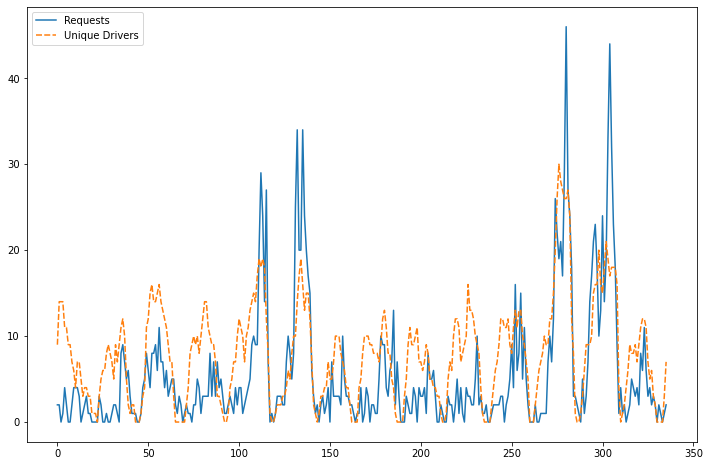

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.lineplot(data=df[['Requests ', 'Unique Drivers', 'Timestamp']])
plt.show()

## QUESTION 9

In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

## SOLUTION 9

As we have done it before in question 3, we are able to create time periods using rolling sums. Since the question wants us to calculate the ratio for 72 hour period, we will create our indexer using `windows_size=72`.

In [39]:
# calculate rolling sums by 3 days/ 72 hours 
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df_agg_three_days = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum()
df_agg_three_days['zeros_to_eyeballs_ratio'] = df_agg_three_days['Zeroes '] / df_agg_three_days['Eyeballs ']

/var/folders/f3/gnk6jnr56xqcw18yqn9345240000gn/T/ipykernel_19553/1824866488.py:3: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df_agg_three_days = df.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum()


Create time interval column to make the intervals clear.

In [40]:
time_format = "%Y/%m/%d %H:%M"
df_agg_three_days['Time Interval']  = df_agg_three_days.index.strftime(time_format) +  "-" + (df_agg_three_days.index + pd.Timedelta('3 days')).strftime(time_format)
df_agg_three_days

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,zeros_to_eyeballs_ratio,Time Interval
Timestamp,,,,,,,,,,
2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,93.0,20.807776,0.179916,2012/09/10 07:00-2012/09/13 07:00
2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,96.0,20.835553,0.180021,2012/09/10 08:00-2012/09/13 08:00
2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,99.0,20.817696,0.180498,2012/09/10 09:00-2012/09/13 09:00
2012-09-10 10:00:00,828.0,970.0,175.0,157.0,209.0,457.0,102.0,20.817696,0.180412,2012/09/10 10:00-2012/09/13 10:00
2012-09-10 11:00:00,828.0,976.0,176.0,159.0,210.0,453.0,105.0,21.017696,0.180328,2012/09/10 11:00-2012/09/13 11:00
...,...,...,...,...,...,...,...,...,...,...
2012-09-24 02:00:00,20.0,20.0,10.0,3.0,6.0,10.0,0.0,0.619048,0.500000,2012/09/24 02:00-2012/09/27 02:00
2012-09-24 03:00:00,18.0,17.0,7.0,3.0,4.0,10.0,0.0,0.619048,0.411765,2012/09/24 03:00-2012/09/27 03:00
2012-09-24 04:00:00,15.0,14.0,4.0,3.0,3.0,10.0,0.0,0.619048,0.285714,2012/09/24 04:00-2012/09/27 04:00


Find the largest ratio.

In [41]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,zeros_to_eyeballs_ratio,Time Interval
Timestamp,,,,,,,,,,
2012-09-24 01:00:00,21.0,27.0,17.0,3.0,6.0,10.0,0.0,0.619048,0.62963,2012/09/24 01:00-2012/09/27 01:00


Output the time interval of largest ratio which is `2012/09/24 01:00-2012/09/27 01:00`.

In [42]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')['Time Interval']

Timestamp
2012-09-24 01:00:00    2012/09/24 01:00-2012/09/27 01:00
Name: Time Interval, dtype: object

## QUESTION 10

If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

**Hint**: Consider both rider eyeballs and driver supply when choosing

## SOLUTION 10

By using the given hint, we can understand we have to consider eyeballs as demand. As logically, we would decide to add 5 extra drivers to the busiest hour of the day with highest eyeballs but lowest drivers. We can aggregate our dataset by given time column and then find the largest ratio.

In [43]:
df_agg_time = df.groupby('Time (Local)').sum().reset_index()
df_agg_time['eyeball_to_driver_ratio'] = df_agg_time['Eyeballs '] / df_agg_time['Unique Drivers'] 
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,eyeball_to_driver_ratio
23,23,488,193,126,184,119,42,11.269306,4.10084


Finally, output the time that we decide.

In [44]:
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')['Time (Local)']

23    23
Name: Time (Local), dtype: int64

## QUESTION 11

**True or False:** There is exactly two weeks of data in this analysis

## SOLUTION 11

It's very easy to answer this question by pandas timedelta which is explained here: https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html 
Let's calculate the difference between the last and first date in our dataframe.

In [45]:
# check time difference between the beginning and end
(df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0])

Timedelta('13 days 23:00:00')

Compare it with exactly 14 days value.

In [46]:
# compare it with timedelta 14 days to see if the difference exactly matches as 14 days
pd.Timedelta('14 days') == df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]

False

The statement is false, the whole time difference is shorter than 14 days as we prove it below.

In [47]:
# the difference is less than 14 days
pd.Timedelta('14 days') > df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]

True

## QUESTION 12

Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

**Tip**: Visualize the data to confirm your answer if needed.

## SOLUTION 12

We will check the minimum points of supply and demand by aggregating the given data by time. Before aggregating, we will calculate the minimum supply and demand per day.

In [48]:
# find min supply and demand per day
df_min_supply_per_day = df.groupby(['Date'])['Unique Drivers'].min().reset_index().rename(columns={'Unique Drivers':'min_supply_per_day'})
df_min_demand_per_day = df.groupby(['Date'])['Requests '].min().reset_index().rename(columns={'Requests ':'min_demand_per_day'})

# merge demand and supply based on date
supply_demand = pd.merge(df_min_supply_per_day, df_min_demand_per_day, on="Date")
supply_demand

,Date,min_supply_per_day,min_demand_per_day
0,10-Sep-12,3,0
1,11-Sep-12,0,0
2,12-Sep-12,0,0
3,13-Sep-12,0,0
4,14-Sep-12,0,1
5,15-Sep-12,0,0
6,16-Sep-12,0,0
7,17-Sep-12,0,0
8,18-Sep-12,0,0
9,19-Sep-12,0,0


In [49]:
# merge found min values with initial dataset on Date
dataset_w_min_supply_demand = pd.merge(df, supply_demand, on="Date")
dataset_w_min_supply_demand

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Timestamp,Day,completed_trip_ratio_per_driver,min_supply_per_day,min_demand_per_day
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00,0,0.222222,3,0
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00,0,0.142857,3,0
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00,0,0.000000,3,0
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00,0,0.000000,3,0
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00,0,0.363636,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,2012-09-24 02:00:00,0,NaN,0,0
332,24-Sep-12,3,3,3,0,1,0,2012-09-24 03:00:00,0,NaN,0,0
333,24-Sep-12,4,1,1,0,0,0,2012-09-24 04:00:00,0,NaN,0,0
334,24-Sep-12,5,4,2,1,1,3,2012-09-24 05:00:00,0,0.333333,0,0


Check for exact matches with minimum supply and demand. Output the most occuring time of matched rows with using _mode( )_.

In [50]:
# check the exact matches with natural minimums
min_point = dataset_w_min_supply_demand[(dataset_w_min_supply_demand.min_supply_per_day == dataset_w_min_supply_demand['Unique Drivers']) & 
                           (dataset_w_min_supply_demand.min_demand_per_day == dataset_w_min_supply_demand['Requests '])]['Time (Local)'].mode()
min_point

0    4
Name: Time (Local), dtype: int64

In [51]:
# minimum hour is 4 am
min_point[0]

4

Let's also confirm it with aggregating on time and plotting the result.

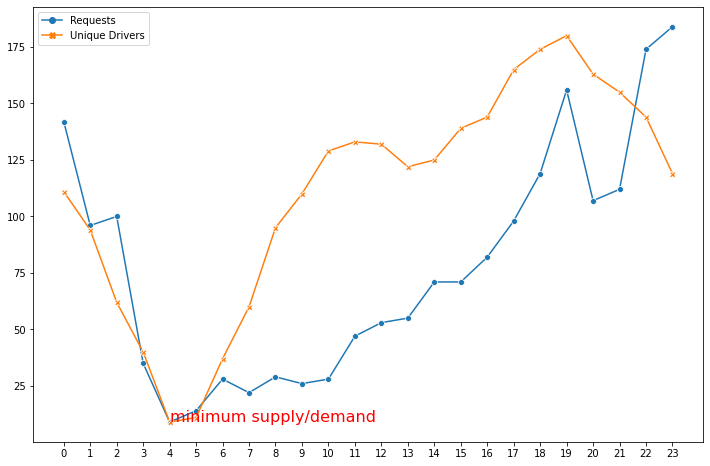

In [52]:
# plot and annotate the minimum hour
df_agg_time = df.groupby('Time (Local)').sum().reset_index()
min_point_value = df_agg_time['Requests '][min_point[0]]
plt.figure(figsize=(12,8))
fig = sns.lineplot(data=df_agg_time[['Requests ', 'Unique Drivers']], markers=True, dashes=False)
fig.set_xticks(df_agg_time['Time (Local)'])
plt.annotate('minimum supply/demand', xy=(min_point[0], min_point_value), color='r', fontsize=16)
plt.show()